<h1 style="color:DodgerBlue">Обзор базовых принципов и паттернов</h1>

<h2 style="color:DodgerBlue">Принципы SOLID</h2>

Принципы SOLID являются фундаментальными концепциями в объектно-ориентированном программировании, которые помогают создавать более модульные, гибкие и поддерживаемые системы. 

Термин "SOLID" представляет собой акроним для набора практик проектирования программного кода и построения гибкой и адаптивной программы. Данный термин был введен известным американским специалистом в области программирования Робертом Мартином (Robert Martin), более известным как "дядюшка Боб" или Uncle Bob.

Сам акроним образован по первым буквам названий SOLID-принципов:

* Single Responsibility Principle (Принцип единственной обязанности)

* Open/Closed Principle (Принцип открытости/закрытости)

* Liskov Substitution Principle (Принцип подстановки Лисков)

* Interface Segregation Principle (Принцип разделения интерфейсов)

* Dependency Inversion Principle (Принцип инверсии зависимостей)

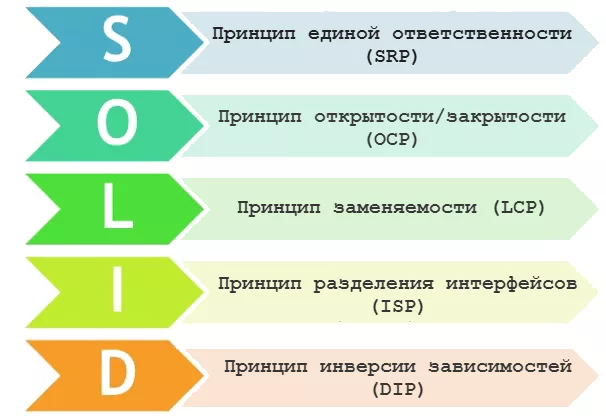

Принципы SOLID - это не паттерны, их нельзя назвать какими-то определенными догмами, которые надо обязательно применять при разработке, однако их использование позволит улучшить код программы, упростить возможные его изменения и поддержку.

<h3 style="color:DodgerBlue">Принцип единственной обязанности (Single Responsibility Principle, SRP)</h3>

Принцип единственной обязанности (Single Responsibility Principle, SRP) является одним из ключевых принципов SOLID в объектно-ориентированном программировании. Этот принцип гласит, что класс должен иметь только одну причину для изменения, то есть класс должен выполнять только одну задачу. Это помогает сделать систему более понятной, гибкой и легкой для тестирования и поддержки.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

В данном случае, класс `Car` несет две обязанности: движение и сигнализация. Это нарушает принцип единственной обязанности, поскольку класс `Car` должен был бы заниматься только тем, что относится к его специфике как автомобиль.

### Решение

Чтобы исправить это нарушение, мы можем разделить эти обязанности на разные классы или интерфейсы. Например, мы можем создать интерфейс `ISignalizable`, который будет содержать метод `Honk()`:

```csharp
public interface ISignalizable
{
    void Honk();
}
```

Теперь класс `Car` может реализовать этот интерфейс, отделив обязанность по сигнализации от основного поведения автомобиля:

```csharp
public class Car : Vehicle, ISignalizable
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Таким образом, класс `Car` теперь имеет только одну причину для изменения — это его специфика как автомобиля, включая движение и возможность издавать звук сигнала. Все остальные аспекты, такие как сигнализация, отделены в отдельный интерфейс `ISignalizable`, что соответствует принципу единственной обязанности.

### Вывод

Применение принципа единственной обязанности позволяет улучшить структуру кода, делая его более чистым, понятным и легким для поддержки. Каждый класс или интерфейс выполняет свою уникальную роль, что упрощает тестирование, расширение функционала и управление зависимостями в системе.


<h3 style="color:DodgerBlue">Принцип открытости/закрытости (Open/Closed Principle, OCP)</h3>

Принцип открытости/закрытости (Open/Closed Principle, OCP) — один из основных принципов SOLID, который гласит, что программные сущности (классы, модули, функции и т.д.) должны быть открыты для расширения, но закрыты для модификации. Это означает, что вы должны быть в состоянии добавлять новую функциональность без изменения существующего кода.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

На первый взгляд, кажется, что класс `Car` уже следует принципу открытости/закрытости, так как мы можем легко добавить новые функции, просто расширив его. Однако, если бы нам пришлось изменить поведение метода `Move` в классе `Vehicle`, мы бы также пришлось изменить его в классе `Car`, что противоречит принципу.

### Решение

Для соблюдения принципа открытости/закрытости, мы можем использовать абстракцию и полиморфизм. Вместо того чтобы наследоваться от `Vehicle` напрямую, класс `Car` может реализовывать интерфейс, который определяет необходимое поведение. Таким образом, если нам нужно изменить поведение, мы можем просто изменить реализацию интерфейса, не затрагивая подклассы.

Сначала определим интерфейс `IMovable`:

```csharp
public interface IMovable
{
    void Move();
}
```

Теперь класс `Vehicle` и `Car` могут реализовывать этот интерфейс:

```csharp
public class Vehicle : IMovable
{
    public void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : IMovable
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Если нам нужно изменить поведение движения для всех транспортных средств, мы можем просто изменить реализацию метода `Move` в интерфейсе `IMovable`, не затрагивая ни одного из классов, реализующих этот интерфейс. Это позволяет нам расширять функциональность без необходимости изменения существующего кода, следуя принципу открытости/закрытости.

### Вывод

Применение принципа открытости/закрытости позволяет делать ваш код более гибким и устойчивым к изменениям. Это особенно важно в больших и сложных системах, где изменения в одной части могут иметь непредвиденные последствия для других частей.

<h3 style="color:DodgerBlue">Принцип Liskov Substitution Principle (Принцип подстановки Лисков) </h3>

Принцип подстановки Барбары Лисков (Liskov Substitution Principle, LSP) — еще один ключевой принцип SOLID, который гласит, что объекты в программе должны быть заменяемыми на экземпляры их подтипов без изменения корректности программы. Другими словами, подтипы должны быть полностью взаимозаменяемы с их базовыми типами.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

В этом примере класс `Car` является подтипом класса `Vehicle` и может быть использован там, где ожидается объект `Vehicle`. Это соответствует принципу подстановки Лисков, так как `Car` может быть заменен на `Vehicle` без нарушения работы программы.

### Пример нарушения LSP

Допустим, мы хотим добавить новый класс `Boat`, который также наследуется от `Vehicle`, но имеет свое уникальное поведение:

```csharp
public class Boat : Vehicle
{
    public void Sail() 
    {
        Console.WriteLine("Лодка плывет");
    }
}
```

Если мы попытаемся использовать объект `Boat` там, где ожидается объект `Vehicle`, и вызвать метод `Move()`, мы получим результат, отличный от того, что мы ожидали. Например, если у нас есть метод, который выводит информацию о движении транспортного средства:

```csharp
public void DisplayMovementInfo(Vehicle vehicle)
{
    vehicle.Move();
}
```

Использование объекта `Boat` вместо `Vehicle` приведет к выводу сообщения, которое не соответствует нашему ожиданию, так как `Boat` не предназначен для движения по суше.

### Решение

Чтобы исправить это нарушение, мы можем разделить общее поведение на несколько интерфейсов, которые будут реализованы различными классами в зависимости от их специфики. Например, мы можем создать интерфейс `ILandTransport` для наземных транспортных средств и `ISeaTransport` для водных:

```csharp
public interface ILandTransport
{
    void Move();
}

public interface ISeaTransport
{
    void Sail();
}

public class Car : ILandTransport
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}

public class Boat : ISeaTransport
{
    public void Sail() 
    {
        Console.WriteLine("Лодка плывет");
    }
}
```

Теперь каждый класс реализует только те интерфейсы, которые соответствуют его функциональности, и мы можем безопасно использовать их в различных контекстах, не нарушая принцип подстановки Лисков.

### Вывод

Применение принципа подстановки Лисков позволяет создавать более надежные и гибкие системы, где подтипы могут быть заменены их базовыми типами без потери корректности работы программы. Это особенно важно в больших и сложных системах, где изменение в одном месте может иметь далеко идущие последствия.


<h3 style="color:DodgerBlue">Принцип разделения интерфейсов (Interface Segregation Principle, ISP)</h3>
Принцип разделения интерфейсов (Interface Segregation Principle, ISP) — еще один ключевой принцип SOLID, который гласит, что клиенты не должны быть вынуждены зависеть от интерфейсов, которые они не используют. Другими словами, большие интерфейсы следует разбивать на более маленькие и конкретные, чтобы клиенты могли выбирать только те интерфейсы, которые действительно им нужны.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть интерфейс `IVehicle`, который определяет все возможные действия, которые может выполнить транспортное средство:

```csharp
public interface IVehicle
{
    void Move();
    void Honk();
    void Sail(); // Не все транспортные средства могут плыть
    void Fly(); // Еще меньше транспортных средств могут летать
}
```

Класс `Car` реализует этот интерфейс, хотя некоторые из методов (`Sail` и `Fly`) не применимы к автомобилю:

```csharp
public class Car : IVehicle
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }

    public void Sail() 
    {
        // Не применимо к автомобилю
    }

    public void Fly() 
    {
        // Также не применимо к автомобилю
    }
}
```

Это нарушает принцип разделения интерфейсов, так как класс `Car` зависит от интерфейса, который включает методы, не используемые этим классом.

### Решение

Чтобы исправить это нарушение, мы можем разделить интерфейс `IVehicle` на более мелкие и конкретные интерфейсы, которые лучше соответствуют различным категориям транспортных средств:

```csharp
public interface IVehicle
{
    void Move();
}

public interface ICanHonk
{
    void Honk();
}

public interface ICanSail
{
    void Sail();
}

public interface ICanFly
{
    void Fly();
}
```

Теперь класс `Car` может реализовывать только те интерфейсы, которые ему действительно нужны:

```csharp
public class Car : IVehicle, ICanHonk
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Класс `Boat` может реализовывать другие интерфейсы, которые подходят для его функциональности:

```csharp
public class Boat : IVehicle, ICanSail
{
    public void Move() 
    {
        Console.WriteLine("Лодка движется...");
    }

    public void Sail() 
    {
        Console.WriteLine("Лодка плывет...");
    }
}
```

### Вывод

Применение принципа разделения интерфейсов позволяет создавать более гибкую и удобную для использования систему, где каждый клиент может выбирать только те интерфейсы, которые ему действительно нужны. Это уменьшает ненужную зависимость и упрощает поддержку и расширение системы.


<h3 style="color:DodgerBlue">Принцип инверсии зависимостей (Dependency Inversion Principle, DIP)</h3>

Принцип инверсии зависимостей (Dependency Inversion Principle, DIP) является одним из пяти основных принципов SOLID в объектно-ориентированном программировании и проектировании. Этот принцип направлен на уменьшение прямых зависимостей между модулями системы путем использования абстракций. В контексте DIP, модули высокого уровня (те, которые выполняют основную бизнес-логику) не должны зависеть от модулей низкого уровня (техническая реализация). Вместо этого оба типа модулей должны зависеть от абстракций. Кроме того, абстракции не должны зависеть от деталей, а детали должны зависеть от абстракций.

Давайте рассмотрим пример с классами `Vehicle` и `Car`, чтобы лучше понять применение принципа инверсии зависимостей на языке C#.

### Исходная ситуация

Предположим, у нас есть система, в которой классы транспортных средств напрямую взаимодействуют с конкретными типами двигателей. Например, класс `Car` может иметь зависимость от класса `PetrolEngine`.

```csharp
public class PetrolEngine
{
    public void Start()
    {
        Console.WriteLine("Запустился бензиновый двигатель...");
    }
}

public class Car
{
    private PetrolEngine _engine;

    public Car()
    {
        _engine = new PetrolEngine();
    }

    public void StartEngine()
    {
        _engine.Start();
    }
}
```

В этом примере класс `Car` напрямую зависит от класса `PetrolEngine`, что нарушает принцип инверсии зависимостей.

### Применение DIP

Чтобы применить принцип инверсии зависимостей, мы можем ввести абстракцию для двигателя и изменить класс `Car`, чтобы он использовал эту абстракцию вместо прямой зависимости от `PetrolEngine`.

```csharp
// Абстракция для двигателя
public interface IEngine
{
    void Start();
}

// Конкретная реализация двигателя
public class PetrolEngine : IEngine
{
    public void Start()
    {
        Console.WriteLine("Запустился бензиновый двигатель...");
    }
}

// Класс Car теперь зависит от абстракции IEngine
public class Car
{
    private IEngine _engine;

    // Зависимость внедряется через конструктор
    public Car(IEngine engine)
    {
        _engine = engine;
    }

    public void StartEngine()
    {
        _engine.Start();
    }
}
```

Теперь класс `Car` зависит только от абстракции `IEngine`, а не от конкретной реализации `PetrolEngine`. Это позволяет легко заменять типы двигателей без изменения кода класса `Car`. Например, если мы хотим использовать электрический двигатель вместо бензинового, мы просто создаем класс `ElectricEngine`, реализующий интерфейс `IEngine`, и передаем его экземпляр в конструктор `Car`.

### Вывод

Применение принципа инверсии зависимостей позволяет сделать систему более гибкой и легко расширяемой. Зависимость от абстракций вместо конкретных реализаций уменьшает связность между компонентами системы и облегчает тестирование, поскольку мы можем легко заменять реальные зависимости на мок-объекты в тестах.


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Single Responsibility Principle (Принцип единственной обязанности) на базе класса Animal

In [5]:
public class Animal{
    public virtual void Eat (){
        Console.WriteLine("Животное ест...");
    }
}

public interface ISound {
void Roar();
}
public class Feline: Animal, ISound{
    public void Roar(){
        Console.WriteLine("Кошачьи мяучат");
    }
}
//Feline Cat = new Feline();
//Cat.Roar();

<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Open/Closed Principle (Принцип открытости/закрытости) на базе класса Animal

In [6]:
public interface IEat{
    void Eat();
}

public class Animal:IEat{
    public void Eat (){
        Console.WriteLine("Животные питаются...");
    }
}

public interface ISound {
void Roar();
}
public class Feline:ISound, IEat{
    public void Roar(){
        Console.WriteLine("Кошачьи мяучат");
    }
    public void Eat(){
        Console.WriteLine("Кошачьи питаются другими животными");
    }
}

//Feline Cat = new Feline();
//Cat.Roar(); Cat.Eat();

Кошачьи мяучат
Кошачьи питаются другими животными


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип Liskov Substitution Principle (Принцип подстановки Лисков) на базе класса Animal

In [9]:
public interface IPredator{
    void Hunt();
}
public interface IHerbivores{
    void Eat();
}
public interface ISound {
void Roar();}
public class Feline: IPredator, ISound{

public void Hunt(){
    Console.WriteLine("Кошки охотятся");
}
public void Roar(){
        Console.WriteLine("Кошачьи мяучат");
    }
}
public class Deer: IHerbivores{
public void Eat(){
    Console.WriteLine("Олени питаются травой");
}
}
//Feline Cat = new Feline();
//Cat.Roar(); Cat.Hunt();
//Deer deer = new Deer();
//deer.Eat();

Кошачьи мяучат
Кошки охотятся
Олени питаются травой


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип Interface Segregation Principle (Принцип разделения интерфейсов) на базе класса Animal

In [11]:
public interface IAnimal{
    void Sound(); 
}
public interface IFly {void Fly(); }
public interface IPredator {void Hunt(); } 
public interface IHerbivores{void EatGrass();}

public class Feline: IPredator, IAnimal{
    public void Sound(){
        Console.WriteLine("Кошачьи мяучат");
    }
    public void Hunt(){
        Console.WriteLine("Кошачьи охотятся на других животных");
    }
}
public class Cow: IHerbivores, IAnimal{
    public void Sound(){
        Console.WriteLine("Коровы мычат");
    }
    public void EatGrass(){
        Console.WriteLine("Коровы едят траву");
    }
}
public class Birds: IFly, IAnimal{
    public void Sound(){
        Console.WriteLine("Птицы поют");
    }
    public void Fly(){
        Console.WriteLine("Птицы летают");
    }
}

/*Feline Cat = new Feline();
Cat.Sound(); Cat.Hunt();
Cow cow = new Cow();
cow.Sound();cow.EatGrass();
Birds bird=new Birds(); bird.Fly();bird.Sound();*/

<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Dependency Inversion Principle (Принцип инверсии зависимостей) на базе класса Animal

In [12]:
public interface IPurr{
    void Purr();
}
public class Pet:IPurr{
    public void Purr(){
        Console.WriteLine("Питомец мурчит");
    }
}
public class Feline{
private IPurr _cat;
public Feline(IPurr cat){
    _cat=cat;
}
public void Care(){
_cat.Purr();
}
}



<h2 style="color:DodgerBlue">Паттерны проектирования</h2>

Паттерн представляет определенный способ построения программного кода для решения часто встречающихся проблем проектирования. В данном случае предполагается, что есть некоторый набор общих формализованных проблем, которые довольно часто встречаются, и паттерны предоставляют ряд принципов для решения этих проблем.

Хотя идея паттернов как способ описания решения распространенных проблем в области проектирования появилась довольно давно, но их популярность стала расти во многом благодаря известной работе четырех авторов Эриха Гаммы, Ричарда Хелма, Ральфа Джонсона, Джона Влиссидеса, которая называлась "Design Patterns: Elements of Reusable Object-Oriented Software" (на русском языке известна как "Приемы объектно-ориентированного проектирования. Паттерны проектирования") и которая вышла в свет в 1994 году. А сам коллектив авторов нередко называют "Банда четырёх" или Gang of Four или сокращенно GoF. Данная книга по сути являлась первой масштабной попыткой описать распространенные способы проектирования программ. И со временем применение паттернов стало считаться хорошей практикой программирования.

**Порождающие паттерны** — это паттерны, которые абстрагируют процесс инстанцирования или, иными словами, процесс порождения классов и объектов. Среди них выделяются следующие:

1. **Прототип (Prototype).** Этот шаблон создает образцы объектов для представления конкретных экземпляров. Он позволяет создавать новые объекты, используя клонирование существующих, вместо создания с нуля. Это особенно полезно при работе с объектами, которые имеют сложную структуру или требуют дорогостоящей инициализации.

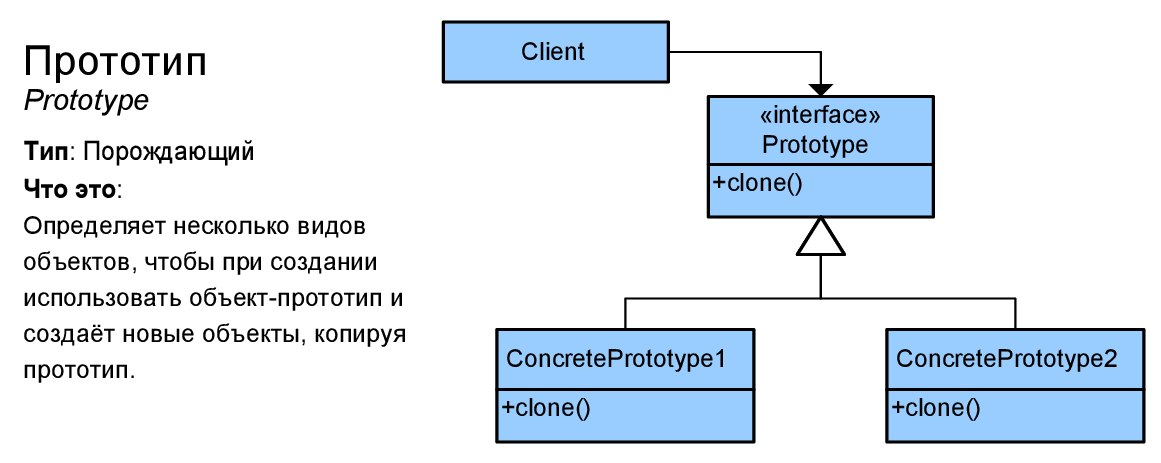

2. **Фабричный метод (Factory Method).** Паттерн, который анализирует внешний вид для объединения нескольких элементов в отдельный супер-класс. Он позволяет создавать объекты, но оставляет решение о том, какой именно объект создавать, дочерним классам.

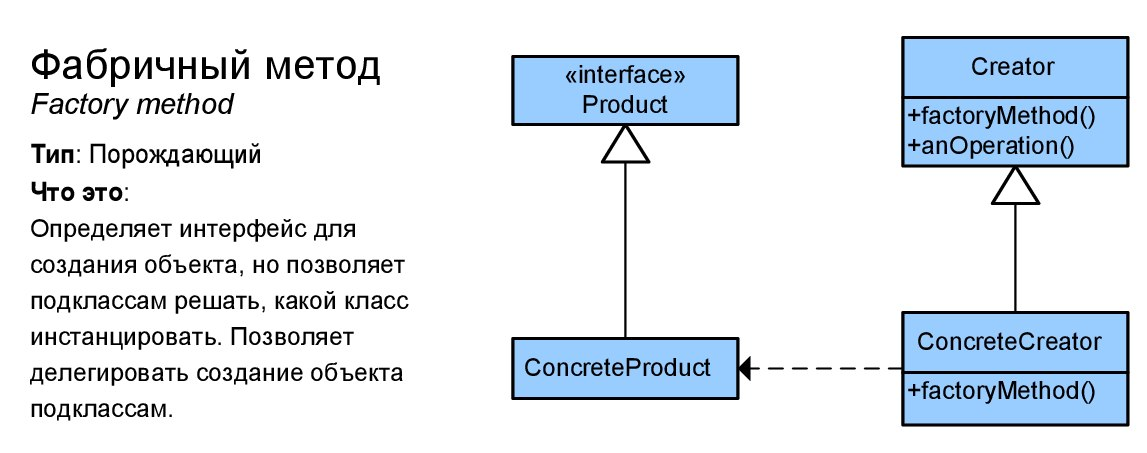

3. **Абстрактная фабрика (Abstract Factory).** Этот шаблон позволяет создавать группы взаимосвязанных объектов, не привязываясь к конкретным классам. Вместо этого используется абстрактное определение фабрик, которые создают объекты на основе некоторых критериев.

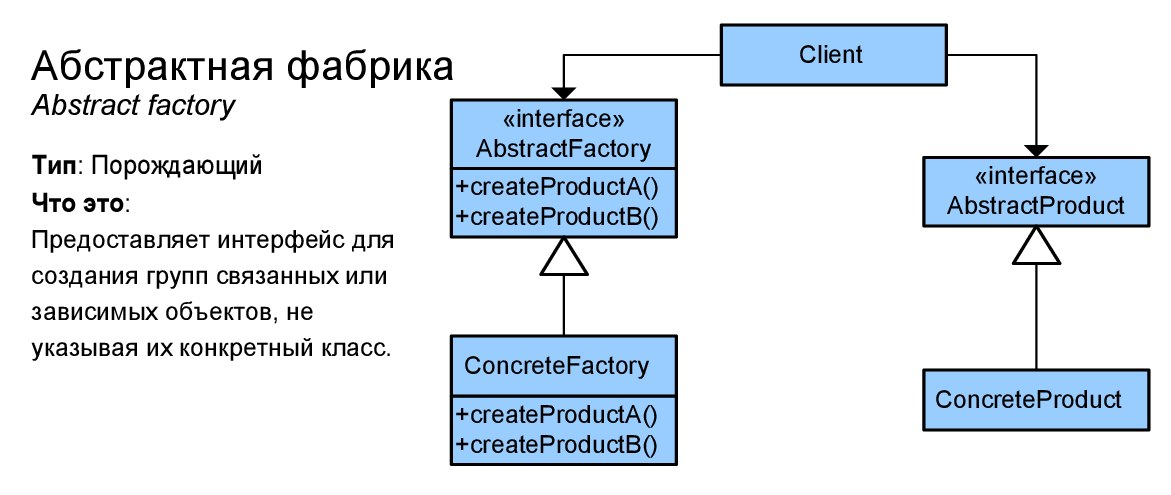

4. **Одиночка (Singleton).** Этот шаблон предназначен для создания единственного экземпляра класса, который обеспечивает глобальный доступ к нему. Он гарантирует, что в системе будет только один экземпляр данного класса.

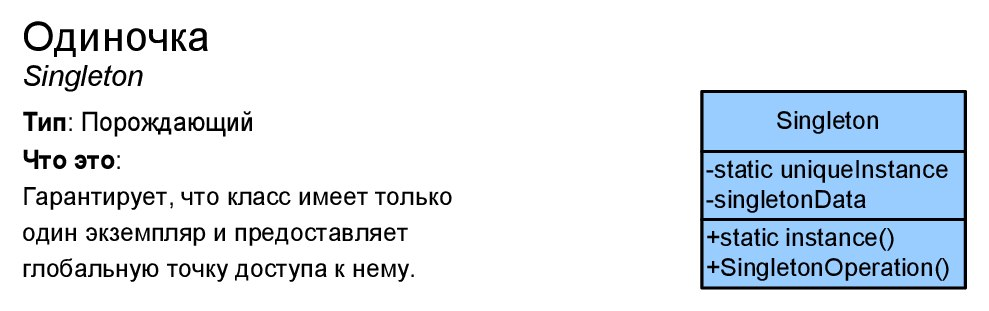

5. **Строитель (Builder).** Этот шаблон помогает создавать сложные объекты, разбивая процесс создания на шаги. Это полезно, когда объект имеет множество конфигурационных параметров, и вы хотите облегчить его поэтапное создание.

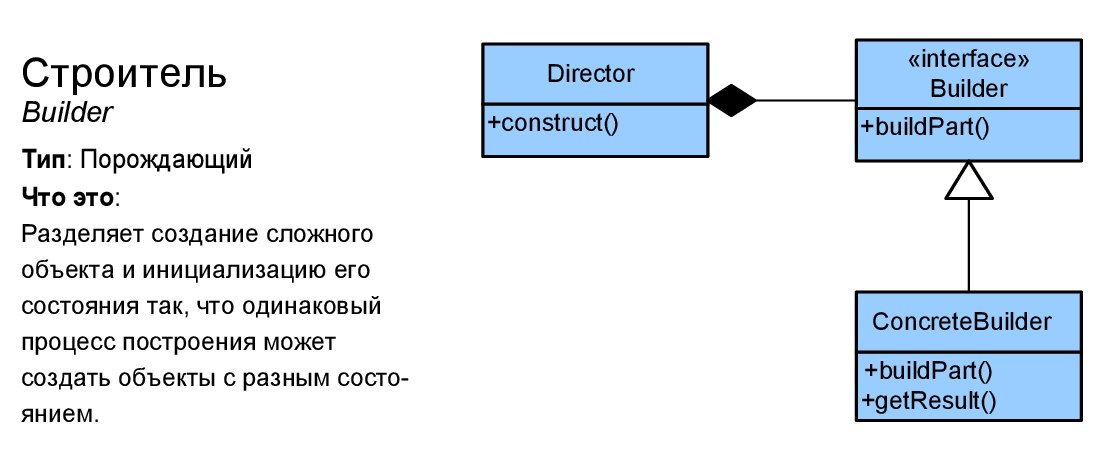

6. **Ленивая инициализация (Lazy Initialization).** Этот шаблон предоставляет механизм для отложенной инициализации классов и объектов по мере их реальной необходимости, что может помочь снизить нагрузку на систему при старте приложения


Другая группа паттернов - **структурные паттерны** - рассматривает, как классы и объекты образуют более крупные структуры - более сложные по характеру классы и объекты. К таким шаблонам относятся:

1. **Мост (Bridge).** Этот паттерн разделяет программное обеспечение на две основные части — абстракцию и реализацию. Это позволяет вносить изменения в каждую часть независимо друг от друга, что способствует гибкости и расширяемости системы. Он использует инкапсуляцию и агрегацию, а также наследование для реализации своей работы.

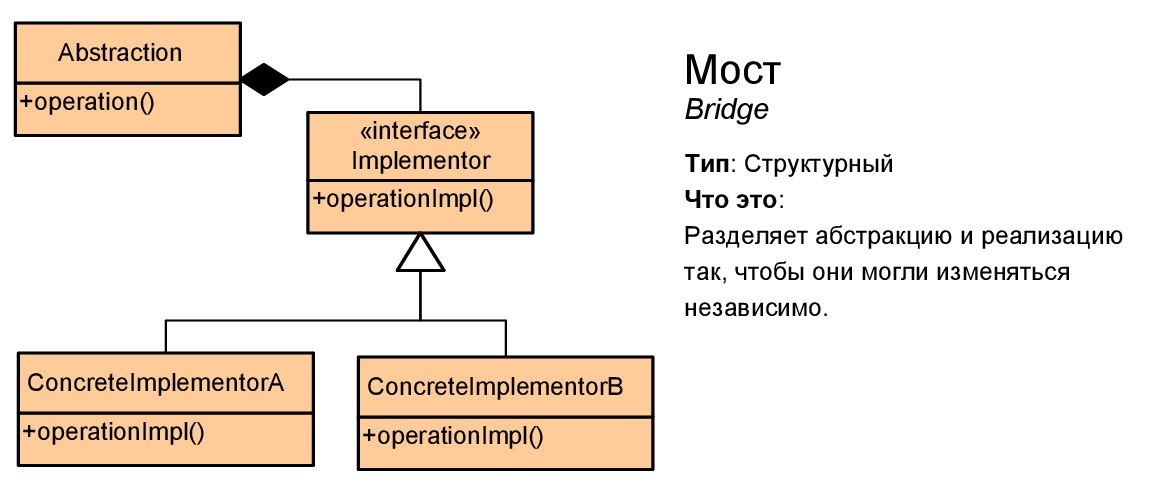

2. **Декоратор (Decorator).** Эта концепция применяется для динамического подключения дополнительных функций и действий к объектам. Он позволяет расширять функциональность сервисов, не изменяя их базовую структуру.

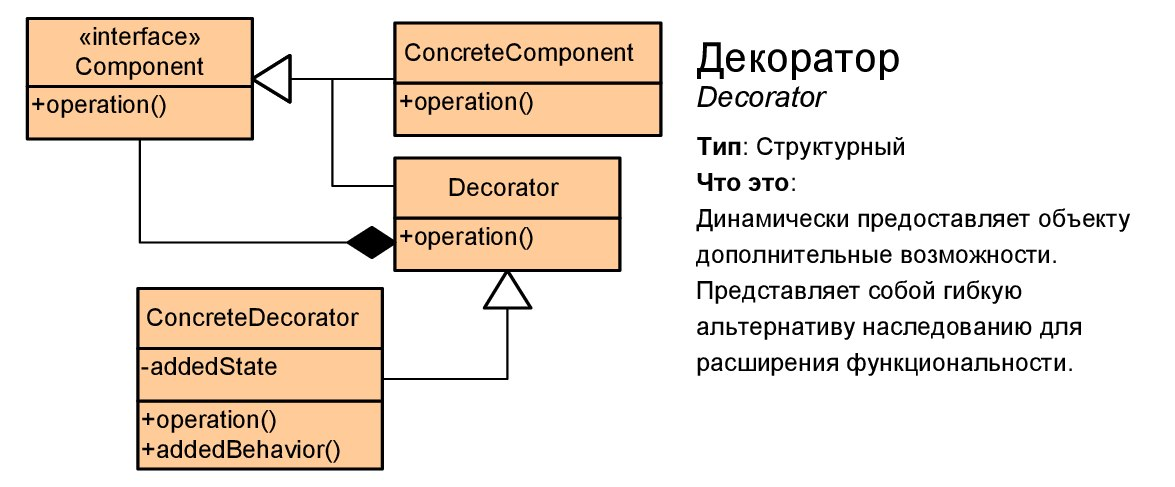

3. **Адаптер (Adapter).** Паттерн адаптера переводит немодифицируемый интерфейс или функциональность объекта в формат, который совместим с ожидаемыми интерфейсами. Он позволяет объектам с разными интерфейсами работать вместе.

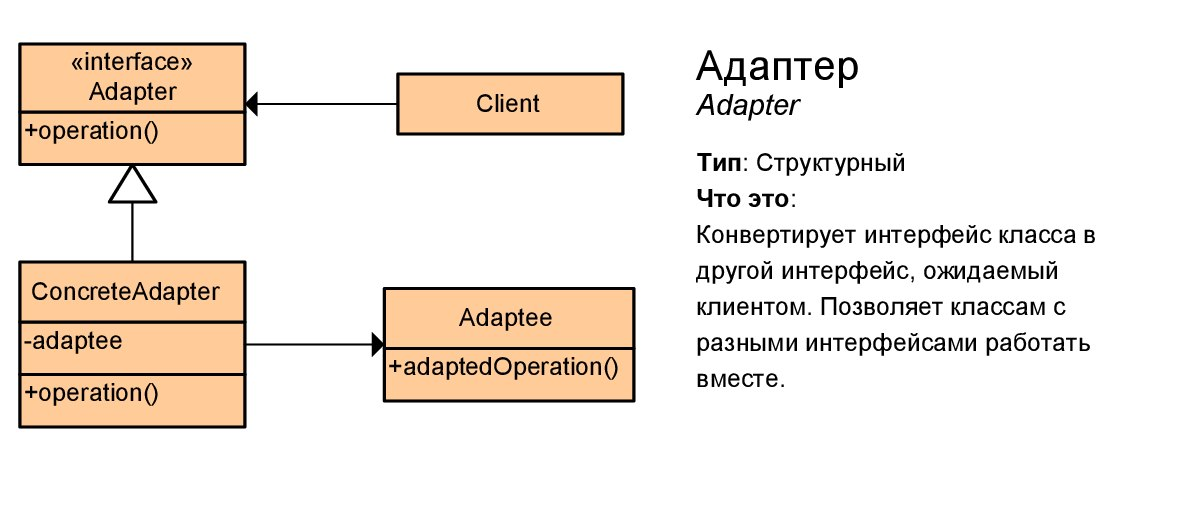

4. **Компоновщик (Composite pattern).** Эта концепция объединяет отдельные объекты в иерархическую структуру с уровневым разделением и логикой взаимодействия. Он позволяет клиентам обращаться к отдельным объектам и их композициям одинаковым образом.

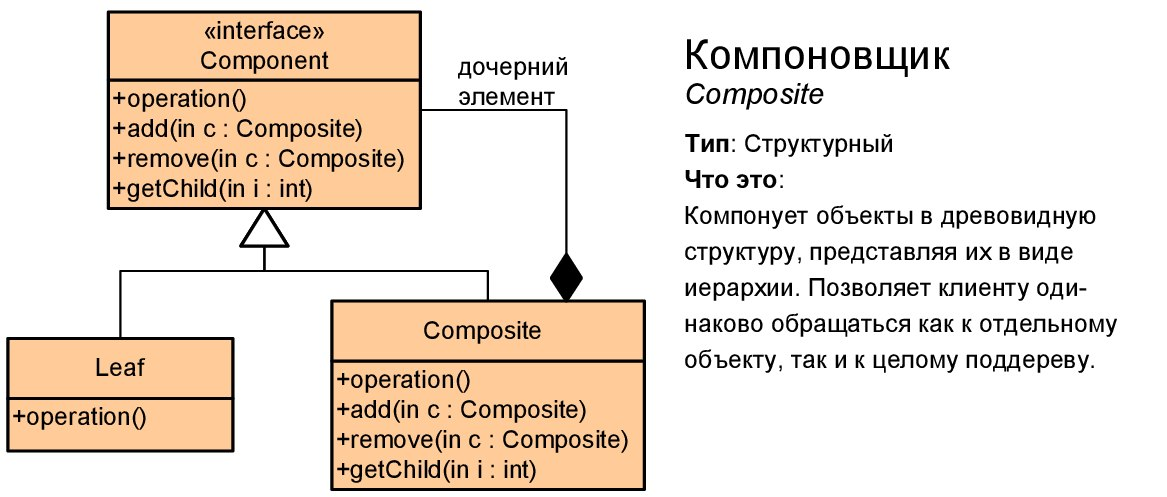

5. **Заместитель (Proxy).** Паттерн заместителя выступает как контейнер, который перехватывает вызовы для других компонентов информационной системы, обрабатывает их и направляет по нужному пути. Он может использоваться для управления доступом к объектам или для ленивой инициализации.

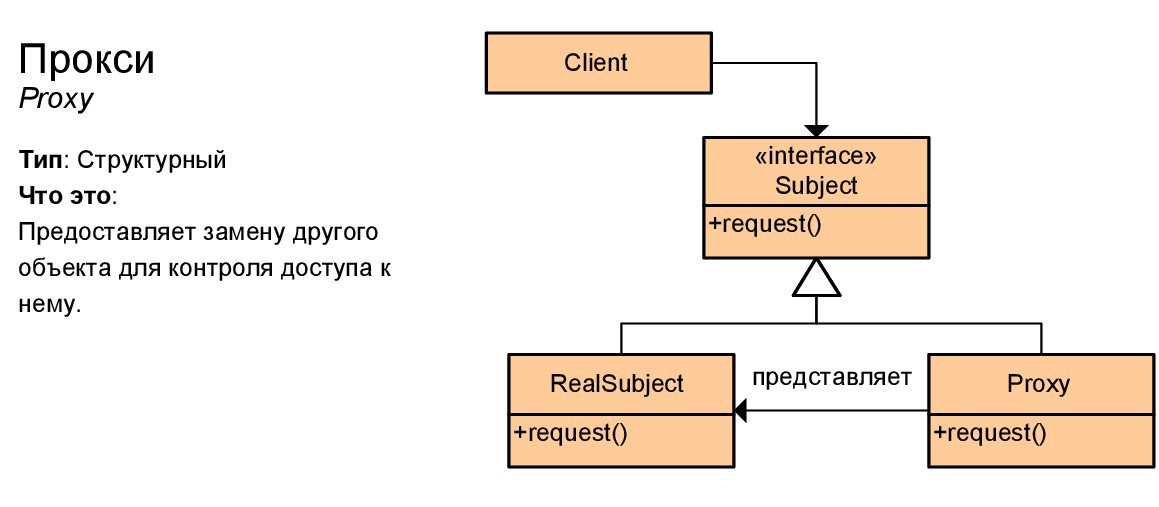

6. **Приспособленец (Flyweight).** Этот паттерн используется, когда нужно эффективно использовать объекты-приспособленцы в нескольких местах информационной системы. Он позволяет экономить ресурсы, обеспечивая разделение общих частей объектов.


Третья группа паттернов называются **поведенческими** - они определяют алгоритмы и взаимодействие между классами и объектами, то есть их поведение. Среди подобных шаблонов можно выделить следующие:

1. **Наблюдатель (Observer).** Паттерн оповещения, который позволяет одному объекту наблюдать за изменениями в других объектах и реагировать на них.

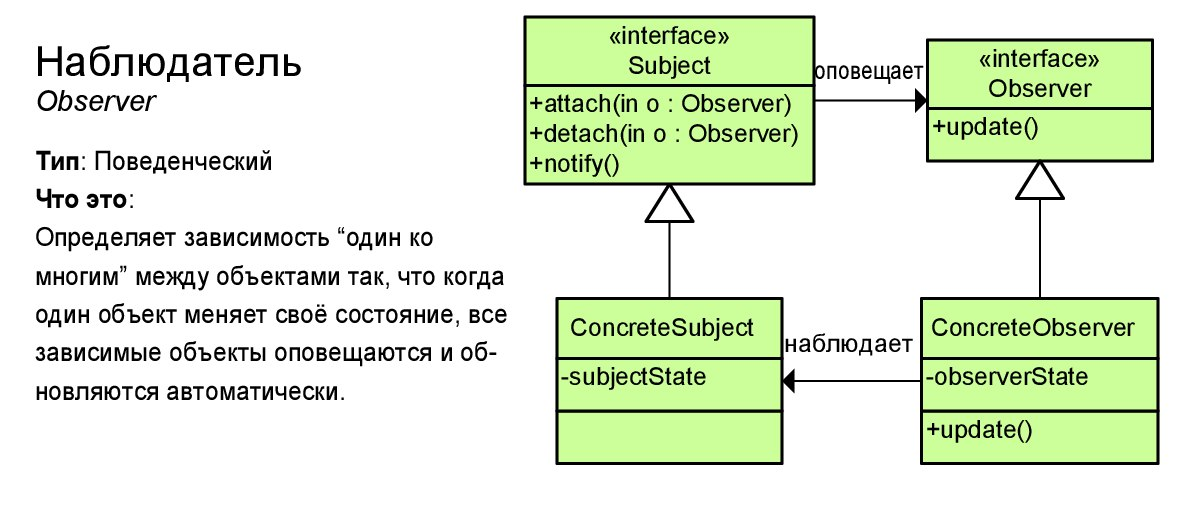

2. **Цепочка обязанностей (Chain of Responsibility).** Этот шаблон определяет и устанавливает порядок обработки запросов среди объектов в системе. Каждый объект может обработать запрос или передать его дальше по цепочке.

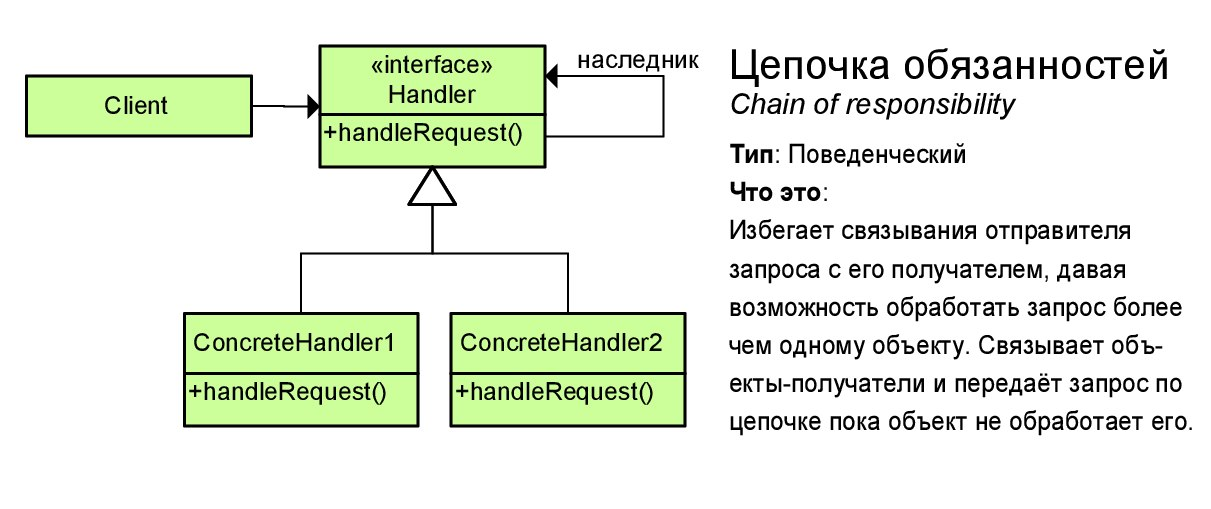

3. **Команда (Command).** Шаблон для инкапсуляции команд и их параметров. Он позволяет создавать объекты, представляющие команды, и передавать их для выполнения в системе.

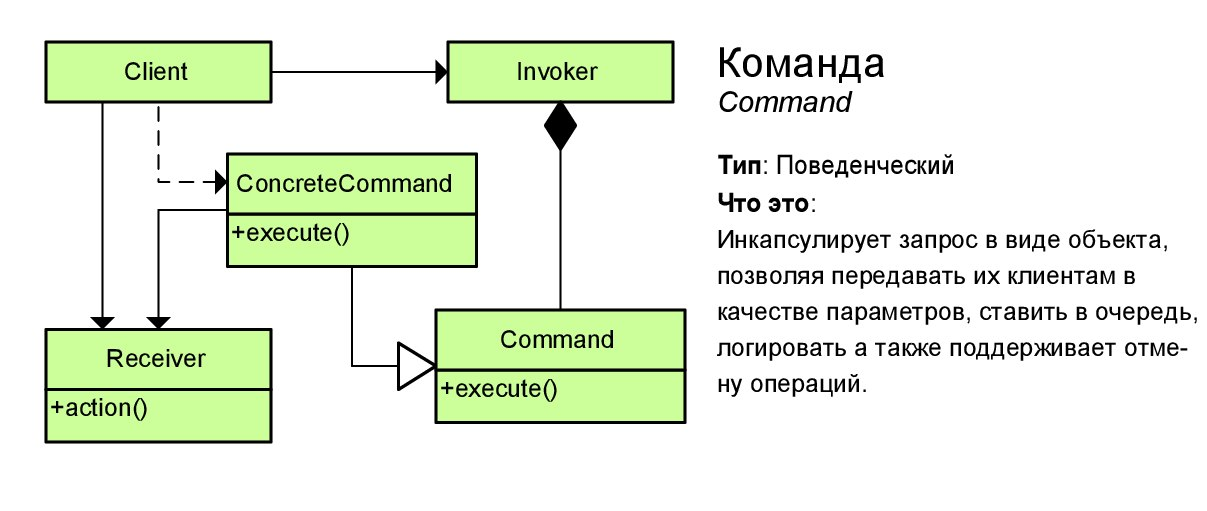

4. **Шаблонный метод (Template Method).** Определяет общую структуру алгоритма, но оставляет некоторые шаги реализации подклассам. Это способствует переиспользованию кода и расширяемости системы.

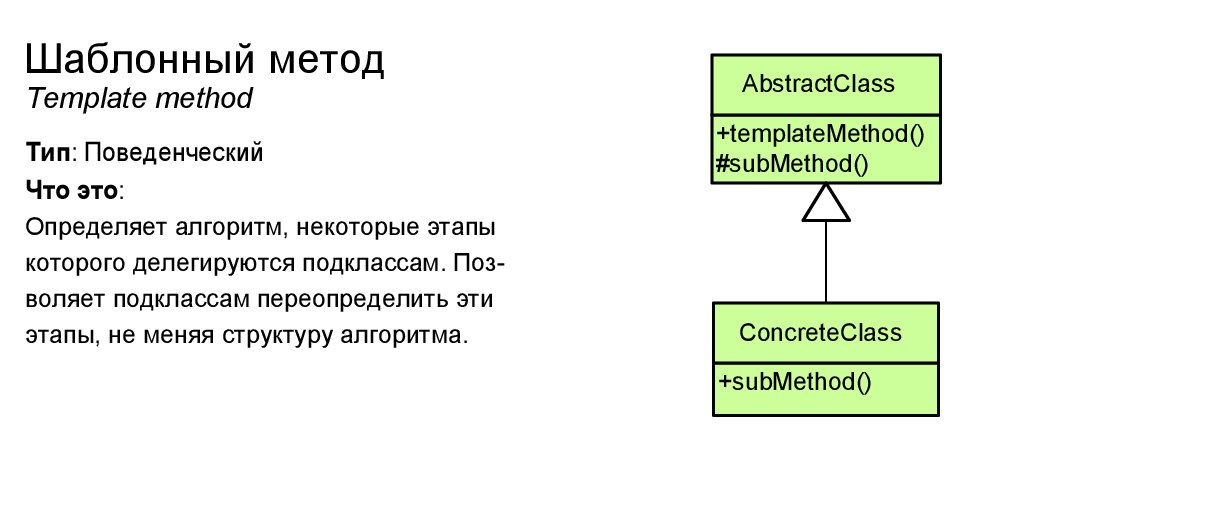

5. **Посетитель (Visitor).** Позволяет определить новые операции для объектов без изменения их классов. Это полезно для анализа и корректировки работы объектов.

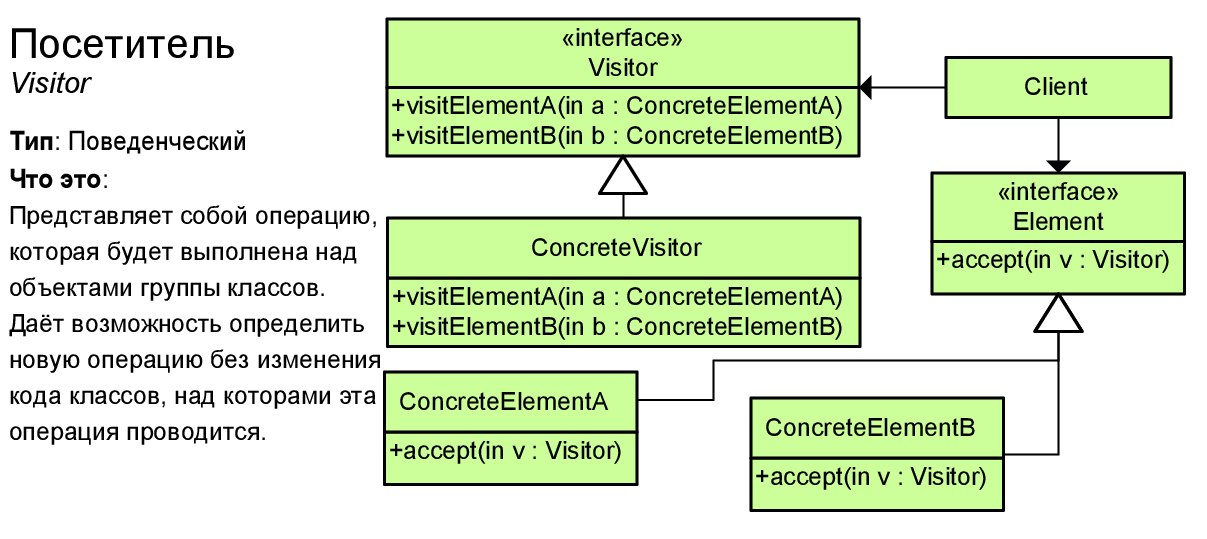

6. **Хранитель (Memento).** Позволяет сохранять и восстанавливать состояние объектов, что полезно, например, для отката к предыдущим версиям.

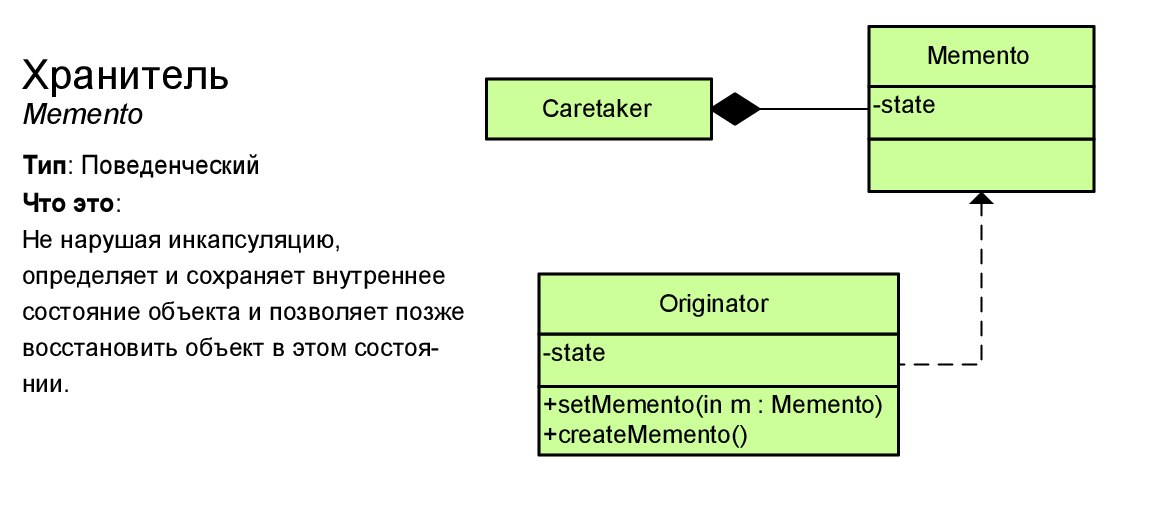

7. **Состояние (State).** Позволяет объектам изменять свое поведение в зависимости от их состояния. Это полезно, когда объект должен менять свое поведение в разных ситуациях.

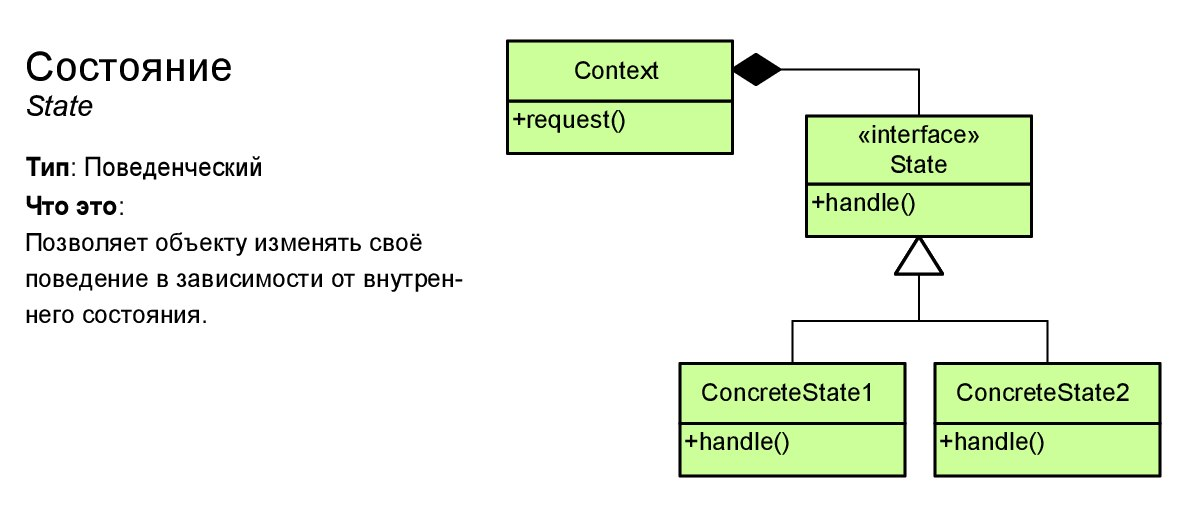

8. **Стратегия (Strategy).** Позволяет выбирать алгоритм выполнения задачи в зависимости от класса объекта. Разные объекты могут использовать разные алгоритмы, но при этом они взаимозаменяемы.

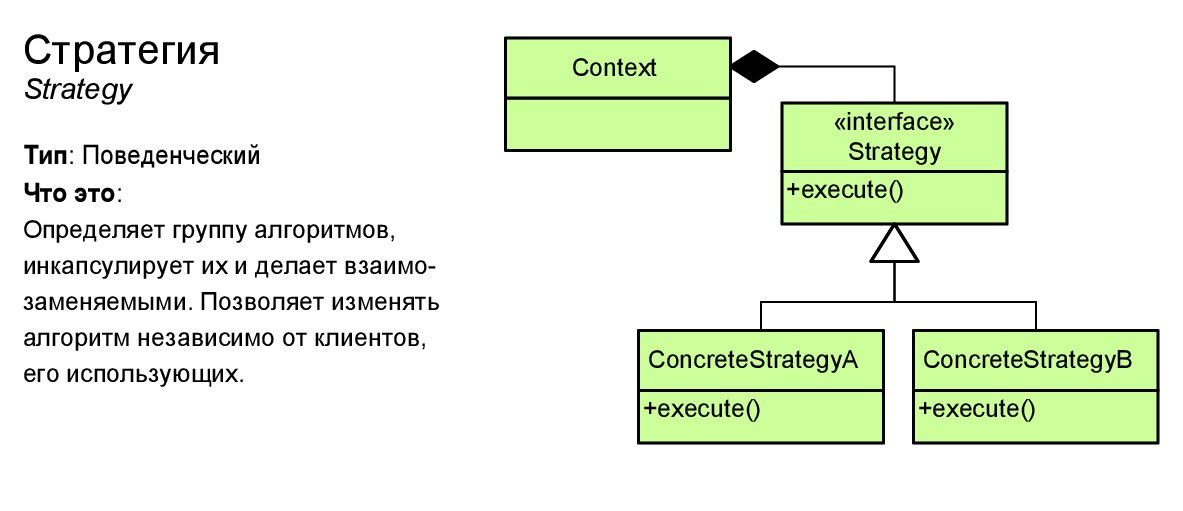

9. **Итератор (Iterator).** Этот паттерн обеспечивает доступ к элементам группы объектов или базы данных с внутренней навигацией, не раскрывая подробности их реализации.

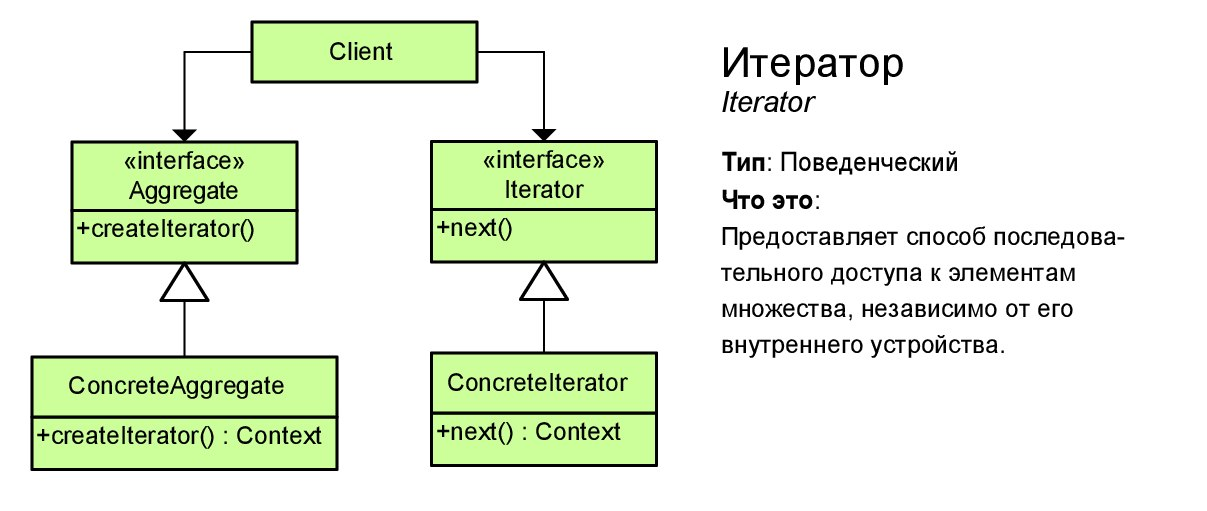

10. **Интерпретатор (Interpreter).** Используется для решения задач с однотипными командами и изменяющимися переменными. Он позволяет интерпретировать и выполнять сложные команды.

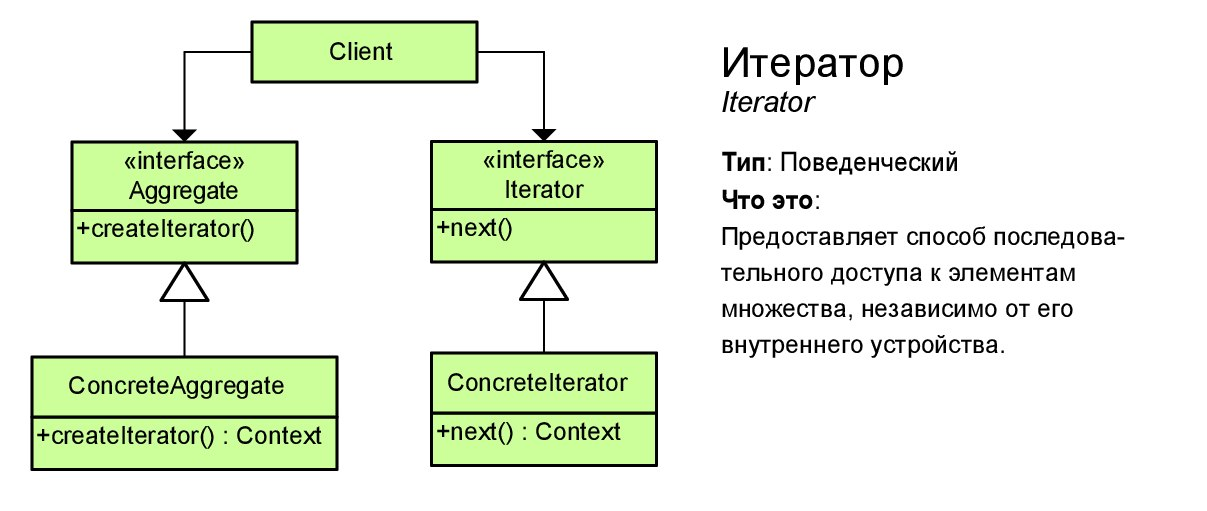

11. **Посредник (Mediator).** Объединяет несколько объектов, позволяя им взаимодействовать друг с другом через посредника, что снижает связность между объектами.

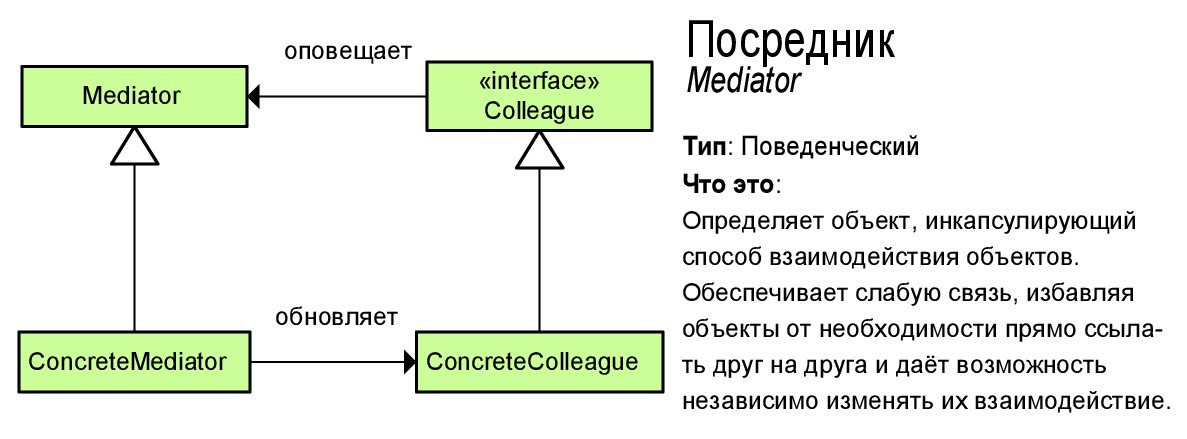

### Дополнительный материал по паттернам

1. Паттерны проектирования на C# https://refactoringguru.cn/ru/design-patterns/csharp

2. Шпаргалка по шаблонам проектирования / Хабр https://habr.com/ru/articles/210288/

3. Паттерны проектирования для C# и платформы .NET Core [2021] Джеффри Чилберто, Гаурав Арораа

    Паттерны проектирования – удобный прием программирования для решения рутинных задач разработки ПО. Грамотное использование паттернов позволяет добиться соответствия любым требованиям и снизить расходы. В этой книге описаны эффективные способы применения паттернов проектирования с учетом специфики языка C# и платформы .NET Core.
    Кроме знакомых паттернов проектирования из книги «Банды четырех» вы изучите основы объектно-ориентированного программирования и принципов SOLID. Затем узнаете о функциональных, реактивных и конкурентных паттернах, с помощью которых будете работать с потоками и корутинами. Заключительная часть содержит паттерны для работы с микросервисными, бессерверными и облачно-ориентированными приложениями. Вы также узнаете, как сделать выбор архитектуры, например микросервисной или MVC.

    https://drive.google.com/file/d/1rKTf0BaLPSXw_6K18tqNDAam_cmpZOMZ/view?usp=sharing

